<a href="https://colab.research.google.com/github/abdo-elbeltagy/Machine-learning/blob/main/k_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# this notebook is to implement kmeans algorithm from scratch

In [1]:
import numpy as np

In [2]:
  from sklearn.datasets import load_digits
  from sklearn.decomposition import PCA
  from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [4]:
data=load_digits()
data.images[0].shape

(8, 8)

In [5]:
  data.data.shape

(1797, 64)

In [6]:
x=data.data
y=data.target
print(x[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


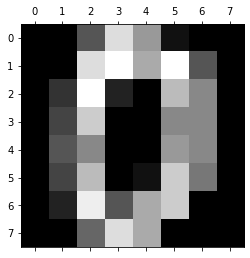

In [18]:

print(data.data[0].reshape(8,-1))
plt.matshow(data.data[0].reshape(8,-1))
plt.show()

# dimentionality reduction using principal component analysis

In [19]:
pca=PCA(2)
pca


PCA(n_components=2)

In [22]:
df=pca.fit_transform(data.data)
df.shape

(1797, 2)

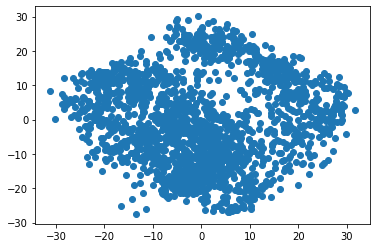

In [28]:
plt.scatter(df[:,0],df[:,1])
plt.show()

In [27]:
df[:,1]

array([ 21.27488273, -20.76869661,  -9.95598623, ...,  -6.9602555 ,
        12.42395534,   6.36554452])

In [29]:
len(x)

1797

In [30]:
from numpy.core.defchararray import replace
idx=np.random.choice(len(x),10,replace=False)
idx

array([  90,  681, 1258, 1046,  504, 1425,  217,  955,  304, 1062])

In [38]:
# this is a side information
# generate random integer array of length 4*3
arr=np.random.randint(2,12,size=(3,4))
arr

array([[ 5, 10,  9,  5],
       [11,  3,  2, 10],
       [ 9,  3,  2,  5]])

In [43]:
arr=np.linspace(1,2,10).reshape(2,5)
np.argmin(arr,axis=1)

array([0, 0])

In [40]:
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
# for compinatorics we (choose) using random choise
arr=np.random.choice(10,5,replace=False)
cent=df[arr,:]

In [52]:
distances=cdist(df,cent,'euclidean')
distances.shape

(1797, 5)

In [53]:
distances

array([[23.16148881, 20.4849874 , 18.52158272, 29.87812434,  0.        ],
       [33.91670073, 25.62164351, 36.17583162, 29.36816563, 43.04203574],
       [26.47456056, 16.55520449, 27.63469697, 21.6455425 , 32.30251399],
       ...,
       [28.62211445, 18.00352328, 28.99462119, 16.80734329, 30.70317425],
       [14.29700664, 11.24712266, 10.25921234, 29.33524429,  9.55981714],
       [15.85456103,  7.139362  , 13.82971758, 23.74397338, 14.93739444]])

In [69]:
cdist(df[1].reshape(1,-1),cent[1].reshape(1,-1),'euclidean')

array([[25.62164351]])

In [65]:
cent[0].reshape(1,-1).shape

(1, 2)

In [74]:
points=np.array([np.argmin(i) for i in distances])
points

array([4, 1, 1, ..., 3, 4, 1])

In [76]:
poi=np.argmin(distances,axis=1)
poi

array([4, 1, 1, ..., 3, 4, 1])

In [77]:
cent

array([[-15.90610513,   3.33246473],
       [ -5.25511693,   1.18335621],
       [-14.0870789 ,   7.91444742],
       [ 23.30686523,   4.26906148],
       [ -1.25946046,  21.27488273]])

In [103]:
centroids=[]
for i in cent:
  centroids.append(i)
centroids=np.array(centroids)
centroids.shapey

(5, 2)

In [85]:
np.vstack(centroids)

array([[-15.90610513,   3.33246473],
       [ -5.25511693,   1.18335621],
       [-14.0870789 ,   7.91444742],
       [ 23.30686523,   4.26906148],
       [ -1.25946046,  21.27488273]])

In [ ]:
x=np.array([1,2])
y=np.array([2,3])


# the k-means algorithm code 

In [185]:
# now its time to design the kmeans algorithms
def kmeans(x,k,itr):
  idx=np.random.choice(len(x),k,replace=False)
  centroids=x[idx,:]
  
  
  
  for _ in range(itr):
    dist=cdist(x,centroids,'euclidean')
    points=np.argmin(dist,axis=1)
    
    centroids=[]
    for i in range(k):
      temp_cent=np.mean(x[points==i],axis=0)
      centroids.append(temp_cent)
    centroids=np.array(centroids)
  return points,np.mean(dist[:,points])
    
    

In [186]:
km,dis=kmeans(x,10,1000)

In [187]:
dis

40.48609795768881

# to choose the best kmean with the least average distance

In [196]:

dist=1e7
for i in range (100):
  
  km,dis=kmeans(x,10,1000)
  if(dist>dis):
    dist=dis
    res=km
  print(i)
  print(dist)

0
40.74078187115946
1
40.74078187115946
2
40.74078187115946
3
40.74078187115946
4
40.74078187115946
5
40.43637774811595
6
40.43637774811595
7
40.43637774811595
8
40.43637774811595
9
40.43637774811595
10
40.43637774811595
11
40.43637774811595
12
40.43637774811595
13
40.43637774811595
14
40.43637774811595
15
40.43637774811595
16
40.43637774811595
17
40.43637774811595
18
40.43637774811595
19
40.43637774811595
20
40.43637774811595
21
40.43637774811595
22
40.43637774811595
23
40.43637774811595
24
40.43637774811595
25
40.43637774811595
26
40.43637774811595
27
40.43637774811595
28
40.43637774811595
29
40.43637774811595
30
40.43637774811595
31
40.43637774811595
32
40.43637774811595
33
40.43637774811595
34
40.43637774811595
35
40.43637774811595
36
40.43637774811595
37
40.43637774811595
38
40.43637774811595
39
40.43637774811595
40
40.43637774811595
41
40.43637774811595
42
40.43637774811595
43
40.43637774811595
44
40.43637774811595
45
40.43637774811595
46
40.43637774811595
47
40.382545262672956
4

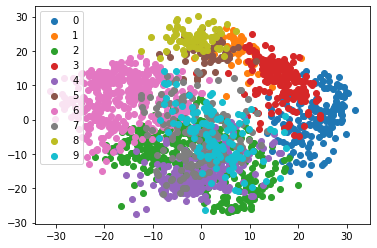

In [197]:
labels=np.unique(km)
for i in labels:
  plt.scatter(df[km==i,0],df[km==i,1],label=i)
plt.legend()
plt.show()

# Testing the clusturing by showing the images of same cluster.

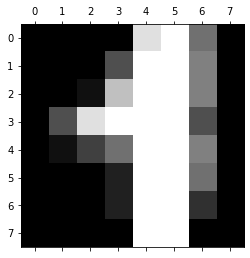

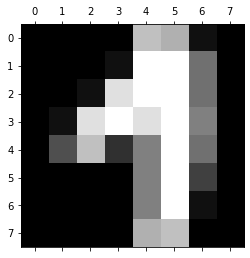

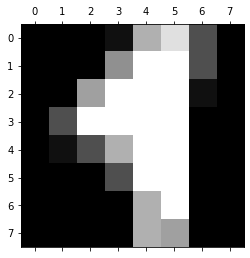

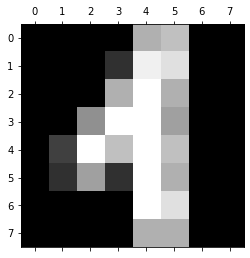

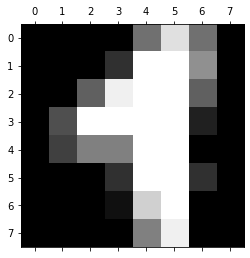

In [200]:
for i in range(5):
  data_1=data.data[km==9]
  plt.matshow(data_1[20+i].reshape(8,-1))
  plt.show()

# apparently this cluster contains number 1

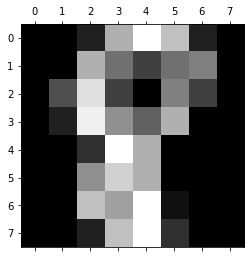

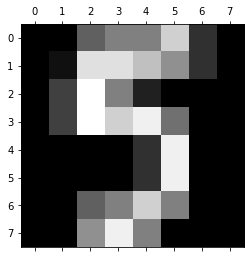

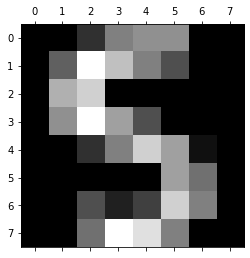

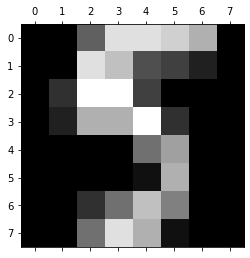

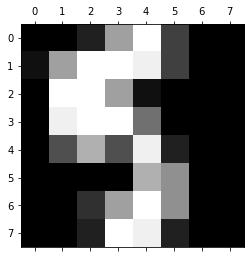

In [203]:
for i in range(5):
  data_1=data.data[km==7]
  plt.matshow(data_1[30+i].reshape(8,-1))
  plt.show()

# and this cluster contains number 5

In [192]:
dist

40.583885602906804

In [119]:
arr=np.array([0, 1, 0, 1, 0])
cent[arr==1]

array([[-5.25511693,  1.18335621],
       [23.30686523,  4.26906148]])

In [120]:
arr==1

array([False,  True, False,  True, False])

In [134]:
arr=np.arange(12).reshape(6,2)
arr

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [135]:
np.mean(arr,axis=0)

array([5., 6.])

In [164]:
data_1=data.data[km==9]

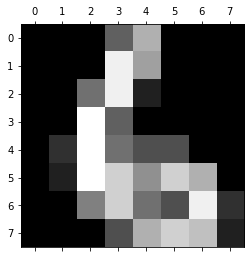

In [167]:
plt.matshow(data_1[98].reshape(8,-1))
plt.show()

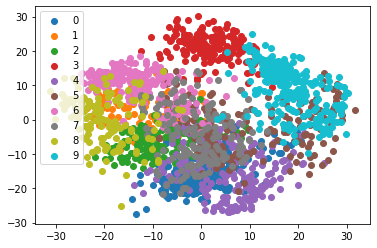

In [170]:
labels=np.unique(km)
for i in labels:
  plt.scatter(df[km==i,0],df[km==i,1],label=i)
plt.legend()
plt.show()

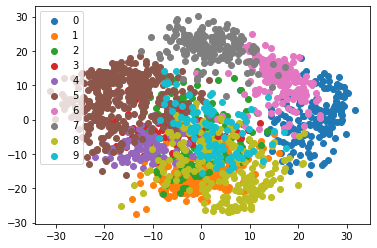

In [172]:
labels=np.unique(km)
for i in labels:
  plt.scatter(df[km==i,0],df[km==i,1],label=i)
plt.legend()
plt.show()